<a href="https://colab.research.google.com/github/CloudInnovator/python-training/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
from imutils import paths
import numpy as np
import shutil
import os


Mounted at /content/gdrive


In [2]:
#hide
#!unzip -u "/content/gdrive/My Drive/archive.zip" -d "/content/gdrive/My Drive/image_dataset"

In [3]:
#hide
#!unzip -u "/content/gdrive/My Drive/mnist.zip" -d "/content/gdrive/My Drive/minst"

In [4]:
# specify path to the flowers and mnist dataset
FLOWERS_DATASET_PATH = "/content/gdrive/My Drive/image_dataset/flowers"
MNIST_DATASET_PATH = "content/gdrive/My Drive/mnist"
# specify the paths to our training and validation set 
TRAIN = "/content/gdrive/My Drive/experiment/train"
VAL = "/content/gdrive/My Drive/experiment/val"
# set the input height and width
INPUT_HEIGHT = 128
INPUT_WIDTH = 128
# set the batch size and validation data split
BATCH_SIZE = 8
VAL_SPLIT = 0.1

In [5]:

#!mkdir -p "/content/gdrive/My Drive/experiment/train"


In [6]:


#!mkdir -p "/content/gdrive/My Drive/experiment/val"


In [7]:
def copy_images(imagePaths, folder):
	# check if the destination folder exists and if not create it
	if not os.path.exists(folder):
		os.makedirs(folder)
	# loop over the image paths
	for path in imagePaths:
		# grab image name and its label from the path and create
		# a placeholder corresponding to the separate label folder
		imageName = path.split(os.path.sep)[-1]
		label = path.split(os.path.sep)[-2]
		labelFolder = os.path.join(folder, label)
		# check to see if the label folder exists and if not create it
		if not os.path.exists(labelFolder):
			os.makedirs(labelFolder)
		# construct the destination image path and copy the current
		# image to it
		destination = os.path.join(labelFolder, imageName)
		shutil.copy(path, destination)

In [8]:
# load all the image paths and randomly shuffle them
print("[INFO] loading image paths...")
imagePaths = list(paths.list_images(FLOWERS_DATASET_PATH))
np.random.shuffle(imagePaths)
# generate training and validation paths
valPathsLen = int(len(imagePaths) * VAL_SPLIT)
trainPathsLen = len(imagePaths) - valPathsLen
trainPaths = imagePaths[:trainPathsLen]
valPaths = imagePaths[trainPathsLen:]
# copy the training and validation images to their respective
# directories
print("[INFO] copying training and validation images...")
#copy_images(trainPaths, TRAIN)
#copy_images(valPaths, VAL)

[INFO] loading image paths...
[INFO] copying training and validation images...


In [9]:
# import necessary packages
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
import numpy as np
!mkdir -p "/content/gdrive/My Drive/saved_image_text/"

In [88]:
def visualize_batch(batch, classes, dataset_type):
	# initialize a figure
	fig = plt.figure("{} batch".format(dataset_type),
		figsize=(BATCH_SIZE, BATCH_SIZE))
	# loop over the batch size
	for i in range(0, BATCH_SIZE):
		# create a subplot
		ax = plt.subplot(2, 4, i + 1)
		# grab the image, convert it from channels first ordering to
		# channels last ordering, and scale the raw pixel intensities
		# to the range [0, 255]
		image = batch[0][i].cpu().numpy()
		print(image.shape, "shape of image")
		np.savetxt("/content/gdrive/My Drive/saved_image_text/" + str(i) + "-.txt", image.reshape(3, -1))
		image = batch[0][i].cpu().numpy()
		image = image.transpose((1, 2, 0))
	
		image = (image * 255.0).astype("uint8")
		# grab the label id and get the label from the classes list
		idx = batch[1][i]
		label = classes[idx]
		# show the image along with the label

		plt.imshow(image)
		plt.title(label)
		plt.axis("off")
	# show the plot
	plt.tight_layout()
	plt.show()

In [89]:
# initialize our data augmentation functions
resize = transforms.Resize(size=(INPUT_HEIGHT,
        INPUT_WIDTH))
hFlip = transforms.RandomHorizontalFlip(p=0.25)
vFlip = transforms.RandomVerticalFlip(p=0.25)
rotate = transforms.RandomRotation(degrees=15)

In [90]:
# initialize our training and validation set data augmentation
# pipeline
trainTransforms = transforms.Compose([resize, hFlip, vFlip, rotate,
        transforms.ToTensor()])
valTransforms = transforms.Compose([resize, transforms.ToTensor()])

In [91]:
# initialize the training and validation dataset
print("[INFO] loading the training and validation dataset...")
trainDataset = ImageFolder(TRAIN,transform=trainTransforms)
valDataset = ImageFolder(root=VAL, transform=valTransforms)
print("[INFO] training dataset contains {} samples...".format(len(trainDataset)))
print("[INFO] validation dataset contains {} samples...".format(len(valDataset)))

[INFO] loading the training and validation dataset...
[INFO] training dataset contains 4269 samples...
[INFO] validation dataset contains 814 samples...


In [92]:
# create training and validation set dataloaders
print("[INFO] creating training and validation set dataloaders...")
trainDataLoader = DataLoader(trainDataset, 
        batch_size=BATCH_SIZE, shuffle=True)
valDataLoader = DataLoader(valDataset, batch_size=BATCH_SIZE)

[INFO] creating training and validation set dataloaders...


[INFO] visualizing training and validation batch...
(3, 128, 128) shape of image
(3, 128, 128) shape of image
(3, 128, 128) shape of image
(3, 128, 128) shape of image
(3, 128, 128) shape of image
(3, 128, 128) shape of image
(3, 128, 128) shape of image
(3, 128, 128) shape of image


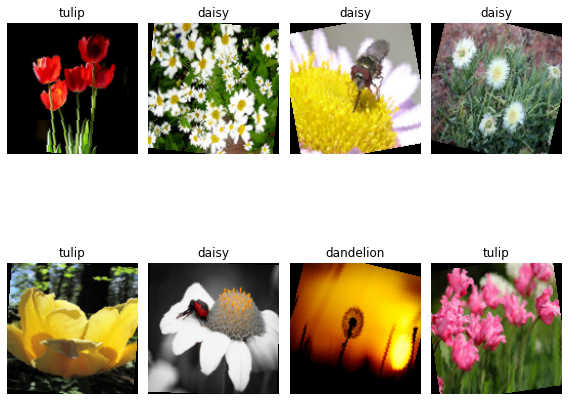

(3, 128, 128) shape of image
(3, 128, 128) shape of image
(3, 128, 128) shape of image
(3, 128, 128) shape of image
(3, 128, 128) shape of image
(3, 128, 128) shape of image
(3, 128, 128) shape of image
(3, 128, 128) shape of image


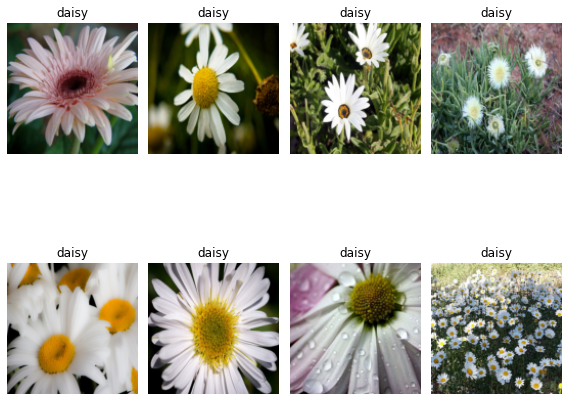

In [93]:
# grab a batch from both training and validation dataloader
trainBatch = next(iter(trainDataLoader))
valBatch = next(iter(valDataLoader))
# visualize the training and validation set batches
print("[INFO] visualizing training and validation batch...")
visualize_batch(trainBatch, trainDataset.classes, "train")
visualize_batch(valBatch, valDataset.classes, "val")